In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

In [93]:
data = pd.read_csv("data/players_updated.csv")

data.head()

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,games,minutes_played,goals,assists,wins,draws,losses,yellow_cards,red_cards,age
0,580276,15,emrehan-gedikli,Emrehan Gedikli,Germany,Germany,2003-04-25,Attack,Centre-Forward,Right,...,1,24,0,0,0,0,1,0,0,18
1,368860,18,torben-musel,Torben Musel,Germany,Germany,1999-07-25,Midfield,Attacking Midfield,Right,...,0,0,0,0,0,0,0,0,0,21
2,48298,18,lars-stindl,Lars Stindl,Germany,Germany,1988-08-26,Attack,Second Striker,Right,...,30,1968,14,10,11,10,9,6,0,32
3,96167,24,amin-younes,Amin Younes,Germany,Germany,1993-08-06,Midfield,Attacking Midfield,Right,...,26,1397,3,3,12,8,6,5,0,27
4,472224,24,felix-irorere,Felix Irorere,France,Germany,2002-06-21,Defender,Centre-Back,NaN,...,0,0,0,0,0,0,0,0,0,18


In [94]:
data.columns

Index(['player_id', 'club_id', 'name', 'pretty_name', 'country_of_birth',
       'country_of_citizenship', 'date_of_birth', 'position', 'sub_position',
       'foot', 'height_in_cm', 'url', 'league_id', 'market_value', 'games',
       'minutes_played', 'goals', 'assists', 'wins', 'draws', 'losses',
       'yellow_cards', 'red_cards', 'age'],
      dtype='object')

In [95]:
res = data.groupby('position')['market_value'].mean()

In [96]:
marketvalue_grouped_by_position(data, league_id='L1', sub_position=True)

,sub_position,market_value
0,Attacking Midfield,8.122979e+06
1,Central Midfield,8.896667e+06
2,Centre-Back,7.686724e+06
3,Centre-Forward,8.481549e+06
4,Defensive Midfield,6.874660e+06
5,Left Midfield,1.211625e+07
6,Left Winger,1.108500e+07
7,Left-Back,9.875000e+06
8,Right Midfield,6.262500e+06
9,Right Winger,1.029706e+07


In [97]:
def marketvalue_grouped_by_position(players, sub_position=False, league_id=None):
    if sub_position:
        if not league_id:
            mean_mkt_val_pos = players.groupby('sub_position')['market_value'].mean().reset_index()
        else:
            if league_id in ['L1', 'ES1', 'GB1', 'IT1', 'FR1']:
                players = players[players['league_id'] == league_id]
                mean_mkt_val_pos = players.groupby('sub_position')['market_value'].mean().reset_index()
            else:
                raise ValueError("league_id argument must either be None or one of 'L1', 'ES1', 'GB1', 'IT1', 'FR1'")
    
    else:
        if not league_id:
            mean_mkt_val_pos = players.groupby('position')['market_value'].mean().reset_index()
        else:
            if league_id in ['L1', 'ES1', 'GB1', 'IT1', 'FR1']:
                players = players[players['league_id'] == league_id]
                mean_mkt_val_pos = players.groupby('position')['market_value'].mean().reset_index()
            else:
                raise ValueError("league_id argument must either be None or one of 'L1', 'ES1', 'GB1', 'IT1', 'FR1'")
    return mean_mkt_val_pos

In [108]:
def convert_position_to_coordinates(position_data, sub_position=False):
    if sub_position:
        position_coords = {
            'Left-Back': (25, 20), 'Centre-Back': (25, 45), 'Right-Back': (25, 70),
            'Left Midfield': (65, 20), 'Defensive Midfield': (45, 45), 'Central Midfield': (65, 45), 'Attacking Midfield': (85, 45), 'Right Midfield': (65, 70),
            'Left Winger': (105, 20), 'Second Striker': (95, 45), 'Centre-Forward': (105, 45), 'Right Winger': (105, 70)
        }
        
        position_data = position_data.dropna(subset=['sub_position'])
    else:
        position_coords = {'Attack': (105, 45), 'Midfield': (65, 45), 'Defender': (25, 45), 'Goalkeeper': (5, 45)}

    position_data['X'] = 0
    position_data['Y'] = 0
    
    for ind, row in position_data.iterrows():
        if sub_position:
            position = row['sub_position']
        else:
            position = row['position']
        position_data.at[ind, 'X'] = position_coords[position][0]
        position_data.at[ind, 'Y'] = position_coords[position][1]
    return position_data

In [109]:
# position_data = marketvalue_grouped_by_position(data, league_id='L1', sub_position=False)
position_data = convert_position_to_coordinates(data, sub_position=True)
data = position_data

<ipython-input-108-518161065d99>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['X'] = 0
<ipython-input-108-518161065d99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Y'] = 0


/Users/yuki/opt/miniconda3/envs/deeplearning/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


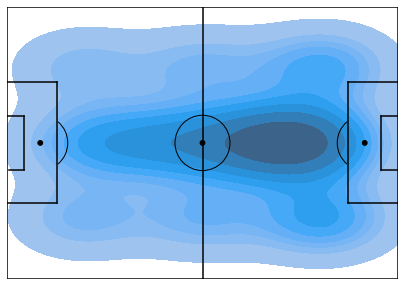

In [150]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(d["X"],d["Y"], weights=d['market_value'], shade=True, n_levels=10, bw_method=0.5)
plt.ylim(0, 90)
plt.xlim(0, 130)

#Display Pitch
plt.show()

In [115]:
data

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,goals,assists,wins,draws,losses,yellow_cards,red_cards,age,X,Y
0,580276,15,emrehan-gedikli,Emrehan Gedikli,Germany,Germany,2003-04-25,Attack,Centre-Forward,Right,...,0,0,0,0,1,0,0,18,105,45
1,368860,18,torben-musel,Torben Musel,Germany,Germany,1999-07-25,Midfield,Attacking Midfield,Right,...,0,0,0,0,0,0,0,21,85,45
2,48298,18,lars-stindl,Lars Stindl,Germany,Germany,1988-08-26,Attack,Second Striker,Right,...,14,10,11,10,9,6,0,32,95,45
3,96167,24,amin-younes,Amin Younes,Germany,Germany,1993-08-06,Midfield,Attacking Midfield,Right,...,3,3,12,8,6,5,0,27,85,45
4,472224,24,felix-irorere,Felix Irorere,France,Germany,2002-06-21,Defender,Centre-Back,NaN,...,0,0,0,0,0,0,0,18,25,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,315867,252,gianluca-scamacca,Gianluca Scamacca,"Roma, Lazio",Italy,1999-01-01,Attack,Centre-Forward,Right,...,8,2,5,8,13,1,0,22,105,45
2804,309393,252,lennart-czyborra,Lennart Czyborra,Germany,Germany,1999-05-03,Midfield,Left Midfield,Left,...,1,0,6,7,4,2,0,22,65,20
2805,197473,130,alberto-grassi,Alberto Grassi,"Brescia, Lombardia",Italy,1995-03-07,Midfield,Central Midfield,Right,...,0,0,3,6,14,3,0,26,65,45
2806,21905,252,valon-behrami,Valon Behrami,Kosovo,Switzerland,1985-04-19,Midfield,Defensive Midfield,Right,...,0,1,10,9,7,3,0,36,45,45


In [122]:
d = data[['X', 'Y', 'market_value']].groupby(['X', 'Y'])['market_value'].mean().reset_index()

In [151]:
d

,X,Y,market_value
0,25,20,7.153290e+06
1,25,45,8.137062e+06
2,25,70,6.224934e+06
3,45,45,8.369900e+06
4,65,20,7.480000e+06
5,65,45,1.008489e+07
6,65,70,6.920217e+06
7,85,45,1.035450e+07
8,95,45,1.355786e+07
9,105,20,1.207207e+07
